In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import plotly.express as px

In [158]:
fontcolor = 'black'
gridcolor = '#99a4ae'
mpl_params = {'font.size': 18,
              'font.sans-serif': 'Helvetica',
              'text.color': fontcolor,
              'axes.labelcolor': fontcolor,
              'xtick.color': fontcolor,
              'xtick.bottom': False,
              'ytick.color': fontcolor,
              'ytick.left': False,
              'grid.color': gridcolor,
              'grid.linewidth': 1.5,
              'grid.alpha': 0.9,
              'axes.spines.left': False,
              'axes.spines.top': False,
              'axes.spines.bottom': False,
              'axes.spines.right': False,
              'axes.edgecolor': gridcolor,
              'axes.grid': True,
              'axes.axisbelow':True,
              'legend.edgecolor': gridcolor,
              'legend.framealpha': 0.8}

mpl.rcParams.update(mpl_params)

In [159]:
df = pd.read_csv('../data/final_olympic_cont.csv')
df.head()

,Unnamed: 0,Name,Gold,Silver,Bronze,Total,Country,GDP,GDP abbreviated,GDP growth,Population,GDP per capita,NOC,Discipline,Continents
0,0,USA United States of America,39,41,33,113,United States,"$19,485,394,000,000",$19.485 trillion,2.27%,"325,084,756","$59,939",United States of America,47,North America
1,1,CHN People's Republic of China,38,32,18,88,China,"$12,237,700,479,375",$12.238 trillion,6.90%,"1,421,021,791","$8,612",People's Republic of China,33,Asia
2,2,JPN Japan,27,14,17,58,Japan,"$4,872,415,104,315",$4.872 trillion,1.71%,"127,502,725","$38,214",Japan,48,Asia
3,3,GBR Great Britain,22,21,22,65,United Kingdom,"$2,637,866,340,434",$2.638 trillion,1.79%,"66,727,461","$39,532",Great Britain,28,Europe
4,4,ROC ROC,20,28,23,71,Russia,"$1,578,417,211,937",$1.578 trillion,1.55%,"145,530,082","$10,846",ROC,34,Asia


In [160]:
df.GDP = df["GDP"].str.replace("$", "").str.replace(",", "").apply(float)

<ipython-input-160-e1c5a5a0d481>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [161]:
df.Population = df.Population.str.replace(",", "").apply(float)

In [162]:
df['GDPPerCap'] = df.GDP / df.Population

In [163]:
## olympic colors
blue = '#0085c7'
yellow = '#f4c300'
black = '#000000'
green = '#009f3d'
red = '#df0024'

## medal colors
gold = '#af9500'
silver = '#d7d7d7'
bronze = '#6a3805'

## Summary Stats

In [230]:
df.describe()

,Unnamed: 0,Gold,Silver,Bronze,Total,GDP,Population,Discipline,GDPPerCap
count,74.000000,74.000000,74.000000,74.000000,74.000000,7.000000e+01,7.000000e+01,74.000000,70.000000
mean,36.500000,4.459459,4.324324,5.189189,13.972973,1.055012e+12,7.981212e+07,9.851351,22005.724253
std,21.505813,7.668096,7.252979,6.690160,20.758212,2.788083e+12,2.329529e+08,12.101944,20893.272373
min,0.000000,0.000000,0.000000,0.000000,1.000000,5.061203e+09,3.817550e+05,1.000000,1528.524682
25%,18.250000,1.000000,1.000000,1.000000,3.000000,5.596506e+10,6.074816e+06,2.000000,5763.841545
50%,36.500000,2.000000,2.000000,2.500000,6.500000,2.749134e+11,1.690335e+07,4.500000,13535.652914
75%,54.750000,4.000000,4.000000,6.000000,13.750000,7.946141e+11,5.087760e+07,12.000000,39202.509922
max,73.000000,39.000000,41.000000,33.000000,113.000000,1.948539e+13,1.421022e+09,48.000000,80295.785395


In [231]:
df.describe(include = ['O'])

,Name,Country,GDP abbreviated,GDP growth,GDP per capita,NOC,Continents,ISO
count,74,74,70,70,70,74,74,74
unique,74,74,70,64,70,74,6,74
top,MDA Republic of Moldova,Portugal,$26.61 billion,4.55%,"$80,296",Portugal,Europe,MDA
freq,1,1,1,2,1,1,30,1


## EDA Charts

In [267]:
## Competition Breakdown
bd =( df.Continents.value_counts() / len(df)).reset_index()
bd

,index,Continents
0,Europe,0.405405
1,Asia,0.256757
2,Africa,0.121622
3,North America,0.108108
4,South America,0.067568
5,Australia,0.040541


In [277]:
labs = bd['index'] + ": " + (bd['Continents']*100).round(2).astype(str) + "%"

Text(0.5, 1.0, 'Countries Competing')

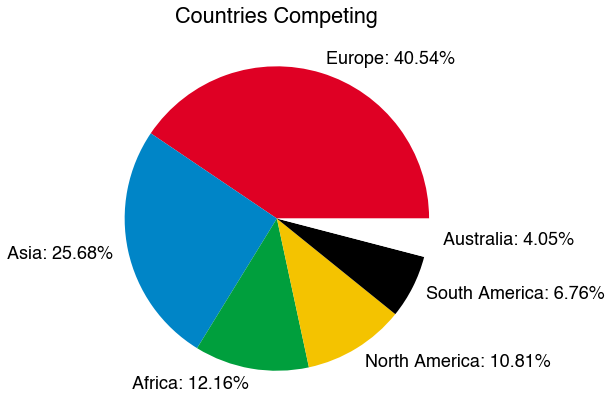

In [283]:
fig, ax = plt.subplots(figsize = (14, 7))

ax.pie(bd['Continents'], colors = [red, blue, green, yellow, black, 'white'], labels = labs)

ax.set_title("Countries Competing")

(0.0, 118.59999999999998)

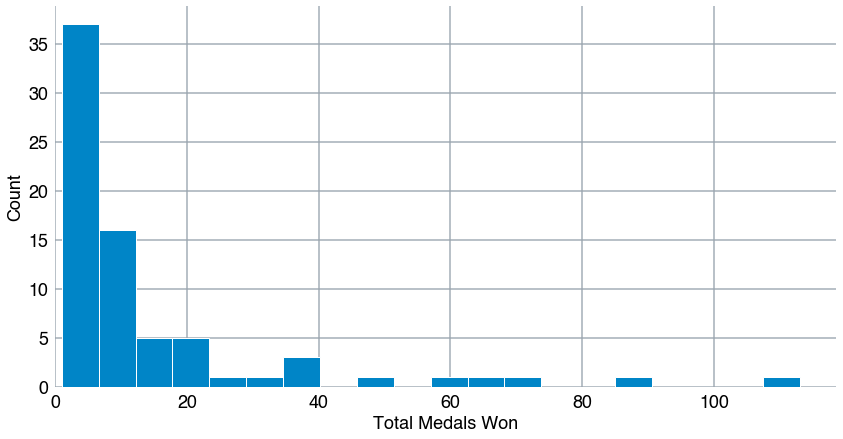

In [165]:
## medal distribution

fig, ax = plt.subplots(figsize = (14, 7))

ax.hist(df.Total, bins = 20, color = blue, edgecolor= 'white')

ax.set_ylabel("Count")
ax.set_xlabel("Total Medals Won")

ax.set_xlim(0)

In [166]:
Gold = df.Gold.value_counts().reset_index().sort_values(by = 'index')
Gold.columns = ['Count', 'Gold']

In [167]:
Silver = df.Silver.value_counts().reset_index().sort_values(by = 'index')
Silver.columns = ['Count', 'Silver']
Bronze = df.Bronze.value_counts().reset_index().sort_values(by = 'index')
Bronze.columns = ['Count', 'Bronze']

In [168]:
count = pd.DataFrame({'Count' : np.arange(0, 42, 1)})

In [169]:
cnts = count.merge(Gold, how = 'outer').merge(Silver, how = 'outer').merge(Bronze, how = 'outer').fillna(0)

In [170]:
cnts.head()

,Count,Gold,Silver,Bronze
0,0,16.0,16.0,12.0
1,1,18.0,19.0,14.0
2,2,8.0,7.0,11.0
3,3,11.0,7.0,6.0
4,4,5.0,7.0,6.0


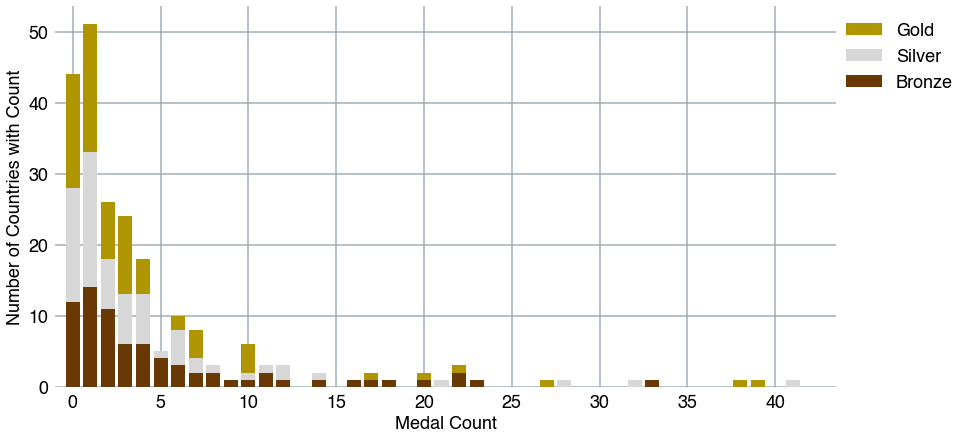

In [174]:
## medal distribution by gold/silver/bronze

fig, ax = plt.subplots(figsize = (14, 7))

ax.bar(cnts.Count, cnts.Gold, label = 'Gold', bottom = cnts.Silver + cnts.Bronze, color = gold)
ax.bar(cnts.Count, cnts.Silver, label = 'Silver', bottom = cnts.Bronze, color = silver)
ax.bar(cnts.Count, cnts.Bronze, label = 'Bronze', color = bronze)

ax.set_xlabel("Medal Count")
ax.set_ylabel("Number of Countries with Count")

ax.set_xlim(-1)

lgd = ax.legend(loc = 'upper right', edgecolor = 'white', bbox_to_anchor = (1.17, 1))

In [175]:
top10 = df[:10]
top10 = top10[::-1].reset_index()

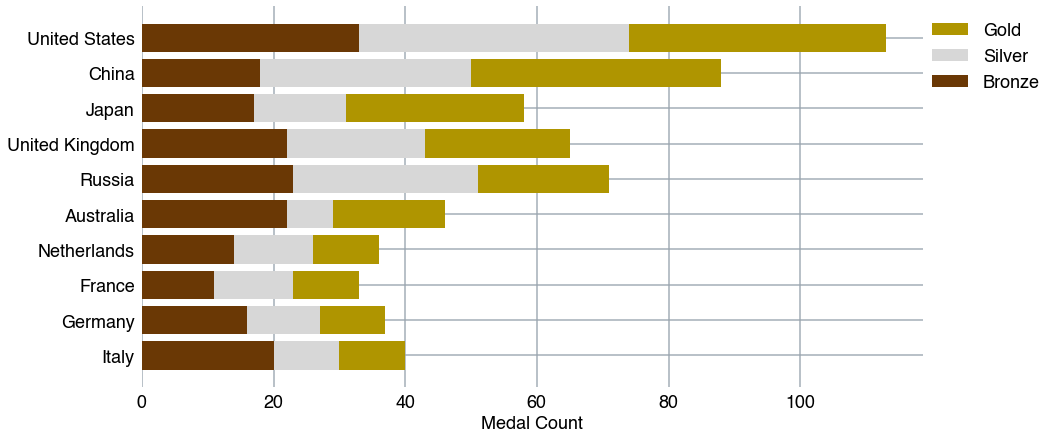

In [178]:
fig, ax = plt.subplots(figsize = (14, 7))

ind = np.arange(len(top10))

ax.barh(ind, top10.Gold, left = top10.Bronze + top10.Silver, color = gold, label = 'Gold')
ax.barh(ind, top10.Silver, left = top10.Bronze, color = silver, label = "Silver")
ax.barh(ind, top10.Bronze, color = bronze, label = "Bronze")

ax.set_yticks(ind)
ax.set_yticklabels(top10.Country)

ax.set_xlabel("Medal Count")

lgd = ax.legend(loc = 'upper right', edgecolor = 'white', bbox_to_anchor = (1.17, 1))


In [179]:
df['ISO'] = df.Name.str.split().str[0]

In [180]:
df.head()

,Unnamed: 0,Name,Gold,Silver,Bronze,Total,Country,GDP,GDP abbreviated,GDP growth,Population,GDP per capita,NOC,Discipline,Continents,GDPPerCap,ISO
0,0,USA United States of America,39,41,33,113,United States,1.948539e+13,$19.485 trillion,2.27%,3.250848e+08,"$59,939",United States of America,47,North America,59939.426997,USA
1,1,CHN People's Republic of China,38,32,18,88,China,1.223770e+13,$12.238 trillion,6.90%,1.421022e+09,"$8,612",People's Republic of China,33,Asia,8611.902053,CHN
2,2,JPN Japan,27,14,17,58,Japan,4.872415e+12,$4.872 trillion,1.71%,1.275027e+08,"$38,214",Japan,48,Asia,38214.203691,JPN
3,3,GBR Great Britain,22,21,22,65,United Kingdom,2.637866e+12,$2.638 trillion,1.79%,6.672746e+07,"$39,532",Great Britain,28,Europe,39531.945333,GBR
4,4,ROC ROC,20,28,23,71,Russia,1.578417e+12,$1.578 trillion,1.55%,1.455301e+08,"$10,846",ROC,34,Asia,10845.985862,ROC


In [181]:
df.at[4, 'ISO'] = 'RUS'

In [182]:
fig = px.choropleth(df, locations = 'ISO', color = 'Total', color_continuous_scale='reds')

fig.show()

In [183]:
fig = px.choropleth(df, locations = 'ISO', color = 'GDP', color_continuous_scale='reds')

fig.show()

In [184]:
fig = px.choropleth(df, locations = 'ISO', color = 'GDPPerCap', color_continuous_scale='reds')

fig.show()

## Medal Count vs GDP Per Capita

In [243]:
df.GDPPerCap.corr(df.Total)

0.29748560009385455

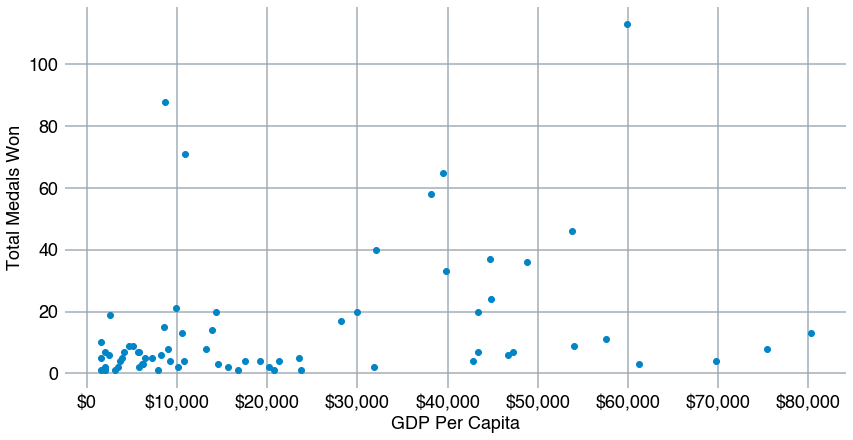

In [191]:
fig, ax = plt.subplots(figsize = (14, 7))

ax.scatter(df.GDPPerCap, df.Total, color = blue)

ax.set_xlabel("GDP Per Capita")
ax.set_ylabel("Total Medals Won")

ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

(-1.0, 81000.0)

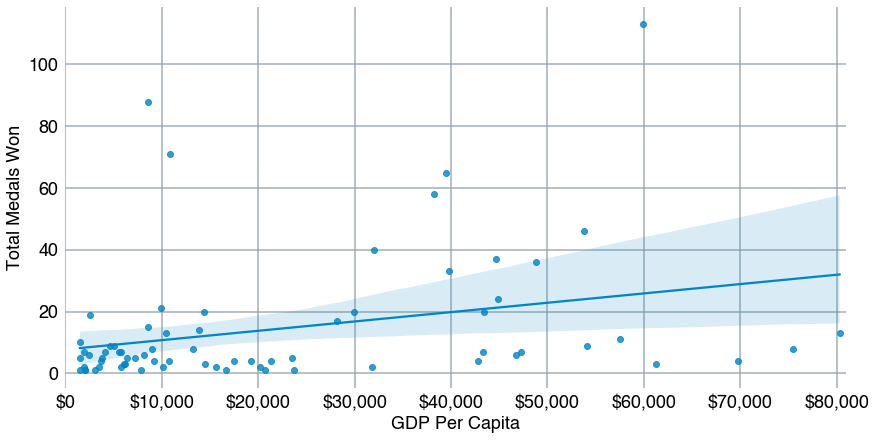

In [202]:
fig, ax = plt.subplots(figsize = (14, 7))
sns.regplot(x = 'GDPPerCap', y = "Total", data = df, ax = ax, color = blue)

ax.set_xlabel("GDP Per Capita")
ax.set_ylabel("Total Medals Won")

ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

ax.set_xlim(-1, 81000)

In [244]:
df.GDPPerCap.corr(df.Gold)

0.29312029688457275

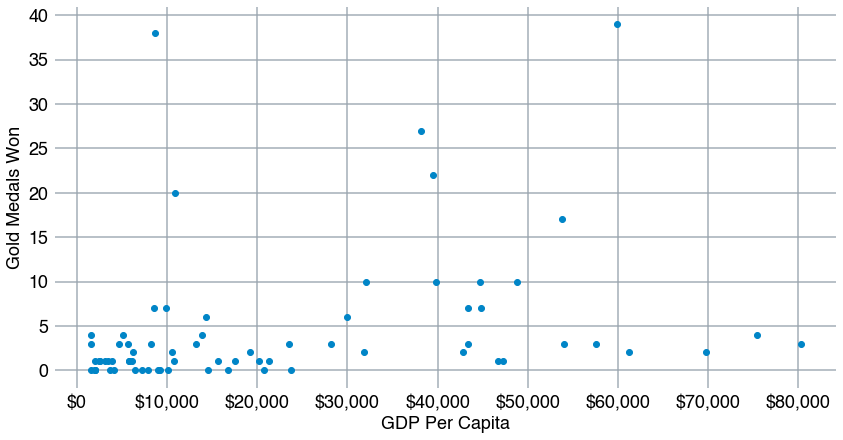

In [192]:
fig, ax = plt.subplots(figsize = (14, 7))

ax.scatter(df.GDPPerCap, df.Gold, color = blue)

ax.set_xlabel("GDP Per Capita")
ax.set_ylabel("Gold Medals Won")

ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

(-1.0, 81000.0)

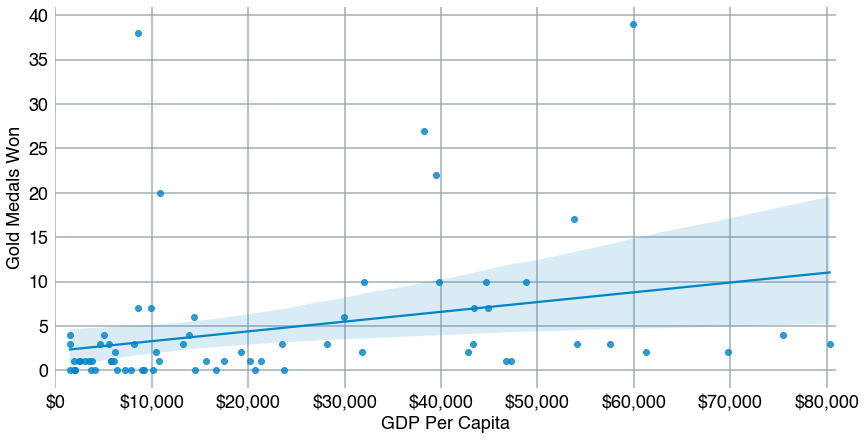

In [229]:
fig, ax = plt.subplots(figsize = (14, 7))
sns.regplot(x = 'GDPPerCap', y = "Gold", data = df, ax = ax, color = blue)

ax.set_xlabel("GDP Per Capita")
ax.set_ylabel("Gold Medals Won")

ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

ax.set_xlim(-1, 81000)

## Medals Won vs GDP

In [245]:
df.GDP.corr(df.Total)

0.8362064171663933

<ipython-input-239-3ff1b0fdb12d>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(-2500000000000.0, 0, ''),
 Text(0.0, 0, '$0'),
 Text(2500000000000.0, 0, '$250 B'),
 Text(5000000000000.0, 0, '$500 B'),
 Text(7500000000000.0, 0, '$750 B'),
 Text(10000000000000.0, 0, '$1 T'),
 Text(12500000000000.0, 0, '$1.25 T'),
 Text(15000000000000.0, 0, '$1.5 T'),
 Text(17500000000000.0, 0, '$1.75 T'),
 Text(20000000000000.0, 0, '$2 T'),
 Text(22500000000000.0, 0, '')]

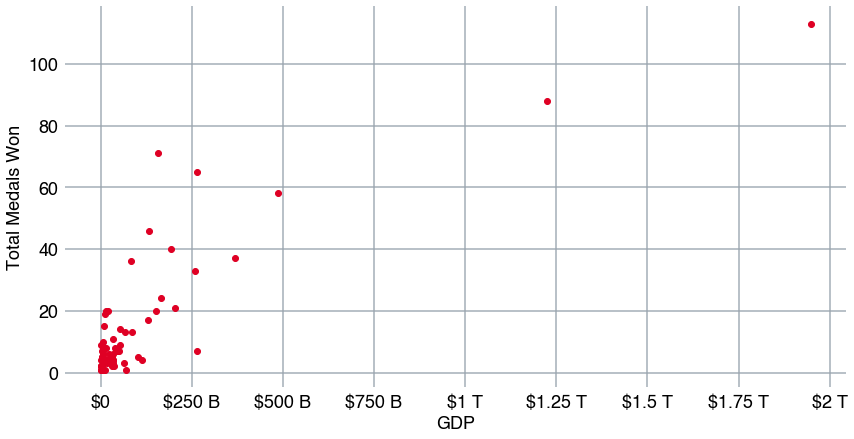

In [239]:
fig, ax = plt.subplots(figsize = (14, 7))

ax.scatter(df.GDP, df.Total, color =red)

ax.set_xlabel("GDP")
ax.set_ylabel("Total Medals Won")

ax.set_xticklabels(['', "$0" ,'$250 B' ,'$500 B', '$750 B' , '$1 T', '$1.25 T', '$1.5 T', '$1.75 T', '$2 T'])


<ipython-input-232-7d75096a4497>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0.0, 0, ''),
 Text(2500000000000.0, 0, '$250 B'),
 Text(5000000000000.0, 0, '$500 B'),
 Text(7500000000000.0, 0, '$750 B'),
 Text(10000000000000.0, 0, '$1 T'),
 Text(12500000000000.0, 0, '$1.25 T'),
 Text(15000000000000.0, 0, '$1.5 T'),
 Text(17500000000000.0, 0, '$1.75 T'),
 Text(20000000000000.0, 0, '')]

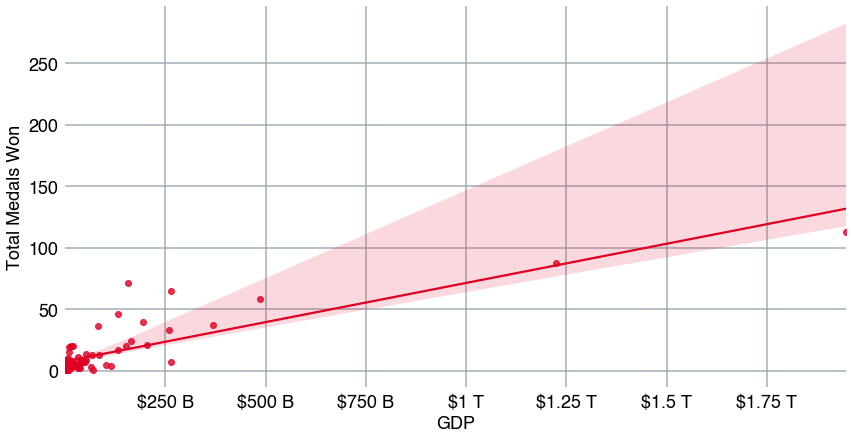

In [232]:
fig, ax = plt.subplots(figsize = (14, 7))
sns.regplot(x = 'GDP', y = "Total", data = df, ax = ax, color = red)

ax.set_xlabel("GDP")
ax.set_ylabel("Total Medals Won")

ax.set_xticklabels(['', '$250 B' ,'$500 B', '$750 B' , '$1 T', '$1.25 T', '$1.5 T', '$1.75 T'])

#ax.set_xlim(-1, 81000)

In [246]:
df.GDP.corr(df.Gold)

0.8491313989604024

<ipython-input-247-593cf87f1317>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(-2500000000000.0, 0, ''),
 Text(0.0, 0, '$0'),
 Text(2500000000000.0, 0, '$250 B'),
 Text(5000000000000.0, 0, '$500 B'),
 Text(7500000000000.0, 0, '$750 B'),
 Text(10000000000000.0, 0, '$1 T'),
 Text(12500000000000.0, 0, '$1.25 T'),
 Text(15000000000000.0, 0, '$1.5 T'),
 Text(17500000000000.0, 0, '$1.75 T'),
 Text(20000000000000.0, 0, '$2 T'),
 Text(22500000000000.0, 0, '')]

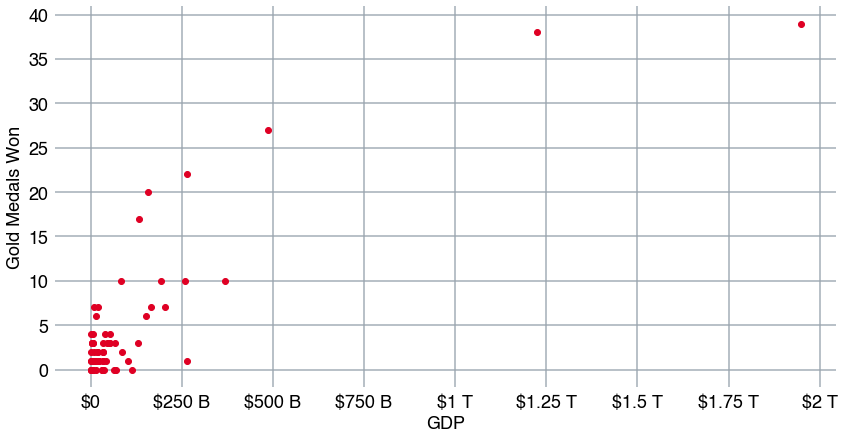

In [247]:
fig, ax = plt.subplots(figsize = (14, 7))

ax.scatter(df.GDP, df.Gold, color =red)

ax.set_xlabel("GDP")
ax.set_ylabel("Gold Medals Won")

ax.set_xticklabels(['', "$0" ,'$250 B' ,'$500 B', '$750 B' , '$1 T', '$1.25 T', '$1.5 T', '$1.75 T', '$2 T'])


<ipython-input-250-09491da5f865>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



(0.0, 19485394000000.0)

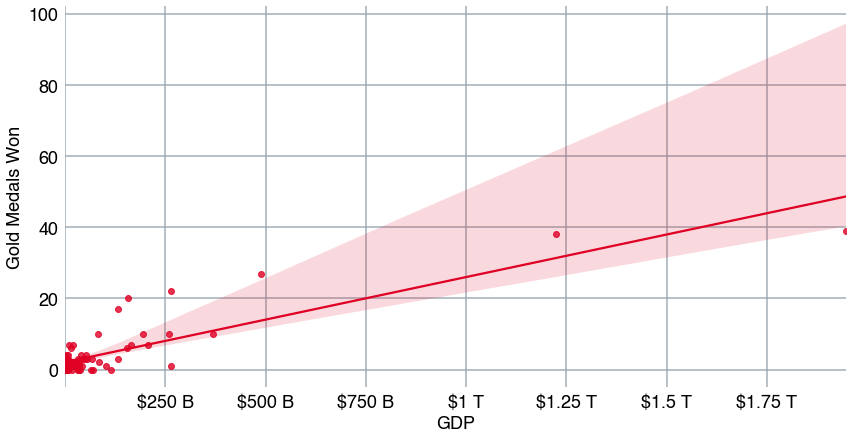

In [250]:
fig, ax = plt.subplots(figsize = (14, 7))
sns.regplot(x = 'GDP', y = "Gold", data = df, ax = ax, color = red)

ax.set_xlabel("GDP")
ax.set_ylabel("Gold Medals Won")

ax.set_xticklabels(['', '$250 B' ,'$500 B', '$750 B' , '$1 T', '$1.25 T', '$1.5 T', '$1.75 T'])

ax.set_xlim(0)

## Disciplines Competed In vs. Total Medals

In [252]:
df.Total.corr(df.Discipline)

0.8686397917210962

Text(0.5, 0, 'Disciplines Competed In')

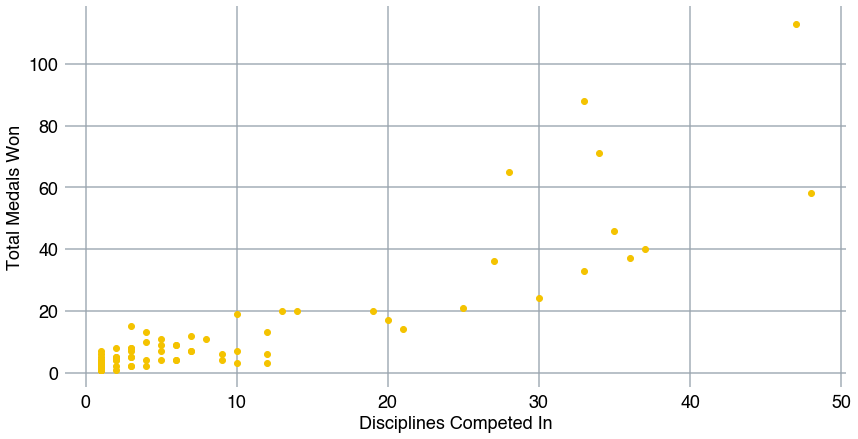

In [254]:
fig, ax = plt.subplots(figsize = (14, 7))

ax.scatter(df.Discipline, df.Total, color = yellow)

ax.set_ylabel("Total Medals Won")
ax.set_xlabel("Disciplines Competed In")

/Users/reillymeinert/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Disciplines Competed In')

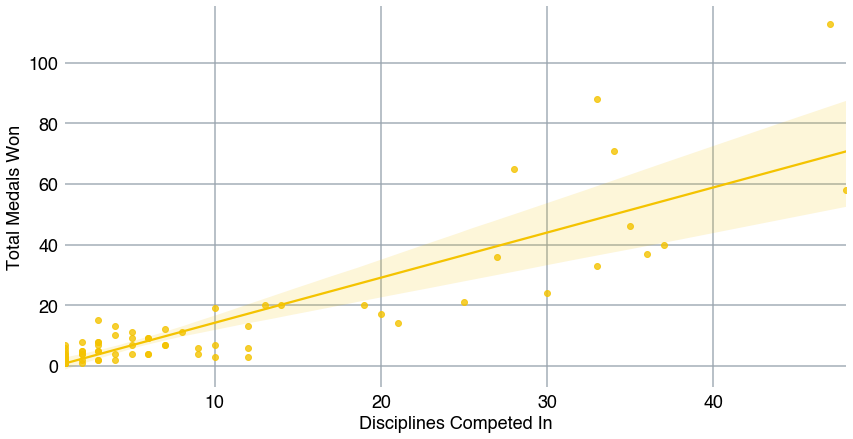

In [256]:
fig, ax = plt.subplots(figsize = (14, 7))

sns.regplot(df.Discipline, df.Total, color = yellow, ax = ax)

ax.set_ylabel("Total Medals Won")
ax.set_xlabel("Disciplines Competed In")

## GDP vs "Winningness"

This chart is great in theory but after further research our numbers for disciplines competed in is not accurate :(

In [259]:
df['Winningness'] = df.Total/df.Discipline ## ratio of medals won to events competed in

In [260]:
df.Winningness.corr(df.GDP)

0.026565159495085488

In [263]:
df[df.Winningness > 2]

,Unnamed: 0,Name,Gold,Silver,Bronze,Total,Country,GDP,GDP abbreviated,GDP growth,Population,GDP per capita,NOC,Discipline,Continents,GDPPerCap,ISO,Winningness
0,0,USA United States of America,39,41,33,113,United States,1.948539e+13,$19.485 trillion,2.27%,3.250848e+08,"$59,939",United States of America,47,North America,59939.426997,USA,2.404255
1,1,CHN People's Republic of China,38,32,18,88,China,1.223770e+13,$12.238 trillion,6.90%,1.421022e+09,"$8,612",People's Republic of China,33,Asia,8611.902053,CHN,2.666667
3,3,GBR Great Britain,22,21,22,65,United Kingdom,2.637866e+12,$2.638 trillion,1.79%,6.672746e+07,"$39,532",Great Britain,28,Europe,39531.945333,GBR,2.321429
4,4,ROC ROC,20,28,23,71,Russia,1.578417e+12,$1.578 trillion,1.55%,1.455301e+08,"$10,846",ROC,34,Asia,10845.985862,RUS,2.088235
13,13,CUB Cuba,7,3,5,15,Cuba,9.685100e+10,$96.85 billion,1.78%,1.133925e+07,"$8,541",Cuba,3,North America,8541.214440,CUB,5.000000
17,17,CZE Czech Republic,4,4,3,11,Czech Republic,NaN,NaN,NaN,NaN,NaN,Czech Republic,5,Europe,NaN,CZE,2.200000
18,18,KEN Kenya,4,4,2,10,Kenya,7.926308e+10,$79.26 billion,4.87%,5.022114e+07,"$1,578",Kenya,4,Africa,1578.281031,KEN,2.500000
19,19,NOR Norway,4,2,2,8,Norway,3.994889e+11,$399 billion,1.92%,5.296326e+06,"$75,428",Norway,3,Europe,75427.550692,NOR,2.666667
25,25,CRO Croatia,3,3,2,8,Croatia,5.521309e+10,$55.21 billion,2.92%,4.182857e+06,"$13,200",Croatia,2,Europe,13199.850550,CRO,4.000000
26,26,IRI Islamic Republic of Iran,3,2,2,7,Iran,4.540128e+11,$454 billion,3.76%,8.067388e+07,"$5,628",Islamic Republic of Iran,3,Asia,5627.754012,IRI,2.333333


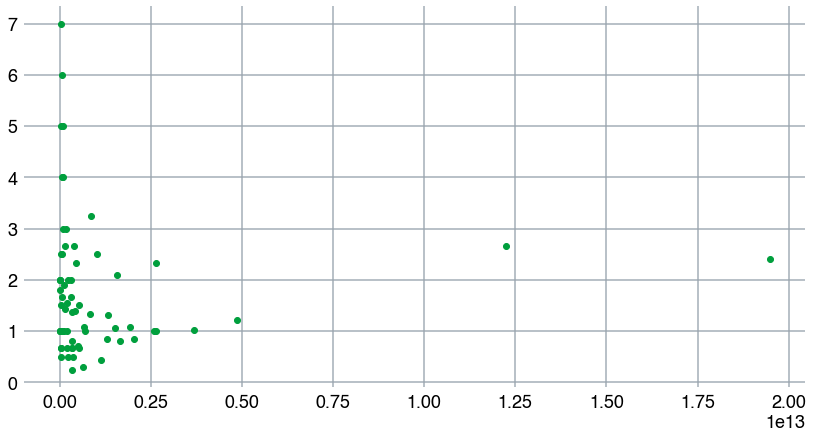

In [262]:
fig, ax = plt.subplots(figsize = (14, 7))

ax.scatter(df.GDP, df.Winningness, color = green)

ax.set_ylabel()